## Tutorial on the use of <code>curve_fit</code> from the <code>scipy.optimize package</code>

The abilility to use a mathematical function to represent data (curve or line fitting) is a powerful tool for materials scientists because it makes it possible to use results from experiments, which always contain some uncertainty, to obtain parameters which describe the materials we want to study.

There are several curve fitting functions in the scientific python stack. This is a tutorial on using the <code>curve_fit</code> function from <code>scipy.optimize</code> to fit one dimensional data.

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

We need some data to start things off. Usually we measure a quantity ($y$) whilst varying a condition ($x$): for example, we might measure the length at different temperatures, the length of a rubber band at different applied forces, the voltage as a function of current etc. 

To keep things simple we are going to create our own simulated dataset. We start off creating an array of 100 $x$ values using <code>np.linspace</code>:

In [2]:
xVariable= np.linspace(0,100,101) #np.linspace(start,stop,N) creates an array of N evenly spaced numbers in the interval [start,stop]

Next we need a number of measurements. Lets make them equal to $x$, with some "experimental" random noise added: 

In [3]:
yMeasurements=(np.random.normal(xVariable,5)) #this adds noise with a standard deviation of 5

Let's plot our simulated data:

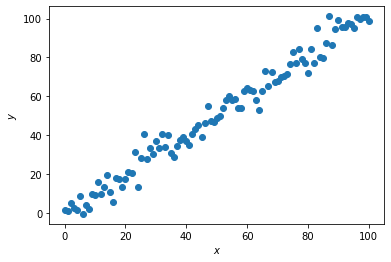

In [4]:
plt.scatter(xVariable,yMeasurements)
plt.xlabel('$x$')
plt.ylabel('$y$');

We can see from the plot that the data are distributed along a line. The equation for a line is:
$y=m x+c$. Let's use <code>curve_fit</code> to find the values of $m$ and $c$ that best fit our data.

First we define the function using the equation for the line:

In [5]:
def yfunc(x,c,m): # y is a function of (x and has parameters c and m)
    return m*x+c # this is how you calculate y

Now we import the function and we run it:

In [6]:
from scipy.optimize import curve_fit
pars,cov=curve_fit(yfunc,xVariable,yMeasurements) 

<code>curve_fit</code> returns a set of parameters (`c` and `m` in order as in `yfunc(x,`**c, m**`)`), which we have assigned to <code>pars</code> and a measure of how good the fit is (<code>cov</code>). Lets's see what values were calculated: 

In [7]:
print(pars)
print(cov)

[-0.86196995  1.03148988]
[[ 9.08013085e-01 -1.35524340e-02]
 [-1.35524340e-02  2.71048678e-04]]


For now we can ignore <code>cov</code>. The fit has calculated c and m (saved in pars) and can now plot the line given by these parameters:

In [8]:
m=pars[1]
c=pars[0]
yFit=m*xVariable+c

print('m = ' + str(m))
print('c = ' + str(c))
print('y = ' + str(m) + 'x +' + str(c))

m = 1.0314898829413344
c = -0.8619699529747222
y = 1.0314898829413344x +-0.8619699529747222


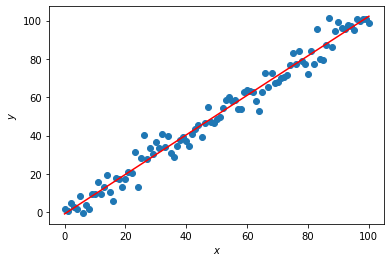

In [9]:
plt.plot(xVariable,yMeasurements,'o') #plot of initial data
plt.plot(xVariable,yFit,'-r')         #plot of fitted function. 
plt.xlabel('$x$')
plt.ylabel('$y$');

As you can see, it's a pretty good fit!

This is an easy fit so we don't need to give any starting guesses. But sometimes we need to help the fit with a guess. We do this with the argument <code>p0</code>:

In [10]:
c_guess=0
m_guess=10
pars,cov=curve_fit(yfunc,xVariable,yMeasurements,p0=[c_guess,m_guess])

**It's important to make sure that the guesses appear in <code>p0</code> in the same order as they appear in <code>yfunc</code>!**